In [1]:
# The code was removed by Watson Studio for sharing.

,Name,Address,Location,MinPrice,MaxPrice,Currency,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award
0,Aqua,"Parkstraße 1, Wolfsburg, 38440, Germany",Wolfsburg,225,225,EUR,"Creative, Modern Cuisine",10.789999,52.433172,+495361606056,https://guide.michelin.com/en/niedersachsen/wo...,http://www.restaurant-aqua.com,3 MICHELIN Stars
1,The Table Kevin Fehling,"Shanghaiallee 15, Hamburg, 20457, Germany",Hamburg,230,230,EUR,Creative,10.002980,53.542623,+494022867422,https://guide.michelin.com/en/hamburg-region/h...,http://www.the-table-hamburg.de/,3 MICHELIN Stars
2,Restaurant Überfahrt Christian Jürgens,"Überfahrtstraße 10, Rottach-Egern, 83700, Germany",Rottach-Egern,259,319,EUR,Creative,11.758229,47.696685,+4980226690,https://guide.michelin.com/en/bayern/rottach-e...,http://www.althoffcollection.com,3 MICHELIN Stars
3,Victor's Fine Dining by christian bau,"Schlossstraße 27, Perl, 66706, Germany",Perl,205,295,EUR,Creative,6.387211,49.535173,+49686679118,https://guide.michelin.com/en/saarland/perl/re...,https://www.victors-fine-dining.de/,3 MICHELIN Stars
4,Rutz,"Chausseestraße 8, Berlin, 10115, Germany",Berlin,198,245,EUR,"Modern Cuisine, Creative",13.386087,52.528351,+493024628760,https://guide.michelin.com/en/berlin-region/be...,https://www.rutz-restaurant.de/,3 MICHELIN Stars


In [2]:
!pip install -U sqlalchemy==1.3.9 
!pip install -U ibm_db_sa 
!pip install -U ipython-sql 
!pip install -U ibm-db 
import ibm_db

In [3]:
%load_ext sql

In [4]:
%sql ibm_db_sa://rzd61380:5bmjYt13dzidW6JU@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB?security=SSL

In [5]:
%%sql

ALTER TABLE MICHELIN_MY_MAPS
ADD average_price float ;

 * ibm_db_sa://rzd61380:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB
Done.


[]

In [6]:
%%sql

update michelin_my_maps
set average_price =  (maxprice + minprice)/2;

 * ibm_db_sa://rzd61380:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB
6503 rows affected.


[]

In [7]:
%%sql

ALTER TABLE MICHELIN_MY_MAPS
ADD price_range float ;

 * ibm_db_sa://rzd61380:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB
Done.


[]

In [8]:
%%sql

update MICHELIN_MY_MAPS
set price_range = maxprice-minprice;

 * ibm_db_sa://rzd61380:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB
6503 rows affected.


[]

In [9]:
print(df.dtypes) #looking at datatypes to see if anything needs to be changed before analysis 

Name            object
Address         object
Location        object
MinPrice        object
MaxPrice        object
Currency        object
Cuisine         object
Longitude      float64
Latitude       float64
PhoneNumber     object
Url             object
WebsiteUrl      object
Award           object
dtype: object


In [10]:
#changing datatypes of the columns MinPrice and MaxPrice

#cleaning up MinPrice
df['NumMinPrice'] = df['MinPrice'].str.replace(',' , '').astype(float)

#cleaning up MaxPrice
df['NumMaxPrice'] = df['MaxPrice'].str.replace(',' , '').astype(float)

In [30]:
#world map of all locations where restaurants are located
import plotly.express as px

worldmap = px.scatter_geo(df,lat='Latitude',lon='Longitude', hover_name="Location")
worldmap.update_layout(title = 'World map', title_x=0.5)
worldmap.show()

In [12]:
#creating new variable called Range, the difference between NumMaxPrice and NumMinPrice
#value is null if the range = 0

df['Range'] = df['NumMaxPrice'] - df['NumMinPrice'] #calculating range

df.groupby(['Currency'])['Range'].mean() #finding average range for each currency 


Currency
BRL       97.037736
CHF       62.599206
CNY      313.921053
CZK      701.714286
DKK      334.523810
EUR       41.761528
GBP       26.082437
HKD      466.600000
HRK      192.173913
HUF    14821.428571
ISK        0.000000
JPY     6740.806643
KRW    40631.868132
MOP      722.727273
NOK      458.846154
PLN       39.833333
RSD        0.000000
SEK      215.645161
SGD       60.644068
THB      425.109091
TWD      585.983871
USD       18.158082
Name: Range, dtype: float64

In [13]:
df.groupby(['Currency','Award'])['Range'].mean() #calculating average range by award and currency

Currency  Award           
BRL       1 MICHELIN Star     191.200000
          2 MICHELIN Stars    221.250000
          Bib Gourmand         60.153846
CHF       1 MICHELIN Star      80.433333
          2 MICHELIN Stars     97.565217
                                 ...    
TWD       Bib Gourmand         44.355556
USD       1 MICHELIN Star      36.738255
          2 MICHELIN Stars     52.722222
          3 MICHELIN Stars     42.307692
          Bib Gourmand          6.304110
Name: Range, Length: 71, dtype: float64

In [14]:
#calculating average price as (NumMinPrice+NumMaxPrice)/2

df['AveragePrice'] = (df['NumMaxPrice'] + df['NumMinPrice'])/2 #calculating average price
df.groupby(['Currency'])['AveragePrice'].mean() #calculating the average price by currency

Currency
BRL      192.896226
CHF      118.081349
CNY      628.244737
CZK     1112.714286
DKK     1292.142857
EUR       84.371287
GBP       76.449821
HKD      791.692593
HRK      514.782609
HUF    25703.571429
ISK    15900.000000
JPY    12465.895611
KRW    83585.164835
MOP     1266.454545
NOK     1858.269231
PLN      199.416667
RSD     2100.000000
SEK     1206.532258
SGD      105.974576
THB     1122.548485
TWD     1471.717742
USD       89.883659
Name: AveragePrice, dtype: float64

In [15]:
#calculating average price by award and currency

pivot_avgprice = pd.pivot_table(
    data=df,
    index=['Currency','Award'],
    values=['AveragePrice']
)
print(pivot_avgprice)

                           AveragePrice
Currency Award                         
BRL      1 MICHELIN Star     314.100000
         2 MICHELIN Stars    475.625000
         Bib Gourmand        132.820513
CHF      1 MICHELIN Star     140.483333
         2 MICHELIN Stars    223.260870
...                                 ...
TWD      Bib Gourmand        477.755556
USD      1 MICHELIN Star     139.785235
         2 MICHELIN Stars    237.888889
         3 MICHELIN Stars    334.153846
         Bib Gourmand         46.215068

[71 rows x 1 columns]


In [16]:
#showing both range and average price for each currency by award 
pivot = pd.pivot_table(
    data = df,
    index = ['Currency','Award'],
    values = ['Range','AveragePrice']
)
print(pivot)

                           AveragePrice       Range
Currency Award                                     
BRL      1 MICHELIN Star     314.100000  191.200000
         2 MICHELIN Stars    475.625000  221.250000
         Bib Gourmand        132.820513   60.153846
CHF      1 MICHELIN Star     140.483333   80.433333
         2 MICHELIN Stars    223.260870   97.565217
...                                 ...         ...
TWD      Bib Gourmand        477.755556   44.355556
USD      1 MICHELIN Star     139.785235   36.738255
         2 MICHELIN Stars    237.888889   52.722222
         3 MICHELIN Stars    334.153846   42.307692
         Bib Gourmand         46.215068    6.304110

[71 rows x 2 columns]


The average range by award for restaurants in the US.
Currency                USD
Award                      
1 MICHELIN Star   36.738255
2 MICHELIN Stars  52.722222
3 MICHELIN Stars  42.307692
Bib Gourmand       6.304110


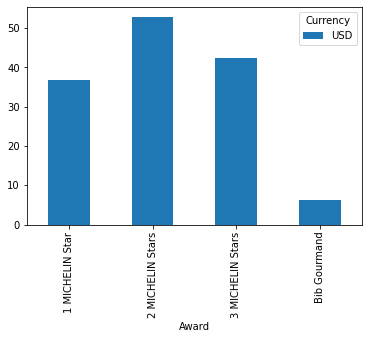

In [17]:
#finding the aggregate mean range for each award in USD

print("The average range by award for restaurants in the US.")

us_pivot_range = df[df.Currency == "USD"].pivot_table(index='Award', columns='Currency', values='Range', aggfunc='mean')
print(us_pivot_range)

ax = us_pivot_range.plot(kind="bar")
fig = ax.get_figure()

The average price by award for restaurants in the US.
Currency                 USD
Award                       
1 MICHELIN Star   139.785235
2 MICHELIN Stars  237.888889
3 MICHELIN Stars  334.153846
Bib Gourmand       46.215068


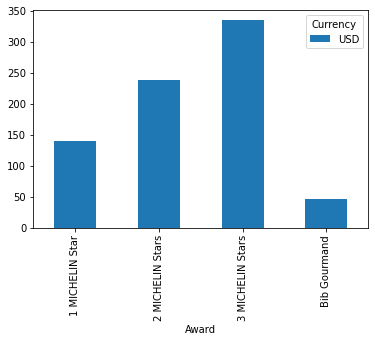

In [18]:
#finding the aggregate mean average price for each award in USD
print("The average price by award for restaurants in the US.")

us_pivot_avg = df[df.Currency == "USD"].pivot_table(index='Award', columns='Currency', values='AveragePrice', aggfunc='mean')
print(us_pivot_avg)

ax = us_pivot_avg.plot(kind="bar")
fig = ax.get_figure()

In [19]:
#top 10 highest avg price restaurants in the US 
print("The top 10 most expensive restaurants on average in the US.")
top_10_restaurants = df[df.Currency == 'USD'].nlargest(10, 'AveragePrice')['Name']

#calculating average price for top 10 restaurants
top_10_prices = df[df.Currency == 'USD'].nlargest(10, 'AveragePrice')['AveragePrice']
top_10_awards = df[df.Currency == 'USD'].nlargest(10, 'AveragePrice')['Award']
print(top_10_restaurants)

The top 10 most expensive restaurants on average in the US.
2151                        Angler SF
93                               Masa
2148                  Niku Steakhouse
77                 The French Laundry
95      Chef's Table at Brooklyn Fare
78                       SingleThread
82                             Quince
92                             Per Se
81                               Benu
402                        Providence
Name: Name, dtype: object


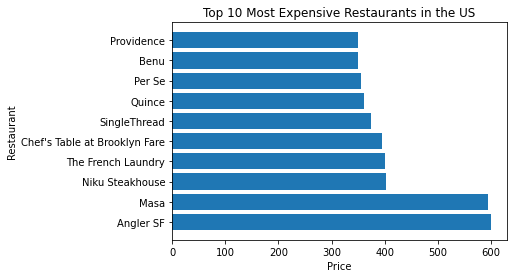

In [20]:
#graph for most expensive restaurants in the US 
import matplotlib.pyplot as plt

index = ['1 MICHELIN Star','2 MICHELIN Stars','3 MICHELIN Stars','Bib Gourmand']

plt.barh(top_10_restaurants,top_10_prices)
plt.title('Top 10 Most Expensive Restaurants in the US')
plt.xlabel('Price')
plt.ylabel('Restaurant')
plt.show()

In [21]:
#top 10 least expensive restaurants in the US 
print("The top 10 least expensive restaurants on average in the US.")
bottom_10_restaurants = df[df.Currency == 'USD'].nsmallest(10, 'AveragePrice')['Name']
bottom_10_prices = df[df.Currency == 'USD'].nsmallest(10, 'AveragePrice')['AveragePrice']
bottom_10_awards = df[df.Currency == 'USD'].nsmallest(10, 'AveragePrice')['Award']
print(bottom_10_restaurants)

The top 10 least expensive restaurants on average in the US.
5018          Taquería El Paisa
4966               New Dumpling
5045                  La Azteca
4980             Los Carnalitos
5336          West New Malaysia
5376                   Pierozek
4946              China Village
4949         LaoXi Noodle House
4950    Rocio's Mexican Kitchen
4960          Burritos La Palma
Name: Name, dtype: object


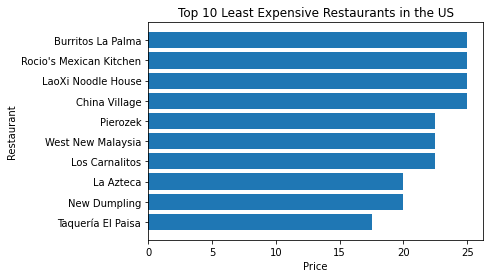

In [22]:
#graph for least expensive restaurants in the US
import matplotlib.pyplot as plt

plt.barh(bottom_10_restaurants,bottom_10_prices)
plt.title('Top 10 Least Expensive Restaurants in the US')
plt.xlabel('Price')
plt.ylabel('Restaurant')
plt.show()

In [23]:
%%sql

select name, location, average_price,award from michelin_my_maps where currency = 'USD' AND award = '1 MICHELIN Star' 
order by average_price desc, average_price asc limit 10 ;

 * ibm_db_sa://rzd61380:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB
Done.


name,location,average_price,award
Angler SF,San Francisco,600.0,1 MICHELIN Star
Niku Steakhouse,San Francisco,402.0,1 MICHELIN Star
Noda,New York,315.0,1 MICHELIN Star
Sushi Taro,Washington,300.0,1 MICHELIN Star
Sushi Yoshizumi,San Mateo,285.0,1 MICHELIN Star
Sushi Ginza Onodera,New York,272.5,1 MICHELIN Star
Masseria,Washington,259.0,1 MICHELIN Star
CUT,Beverly Hills,250.0,1 MICHELIN Star
Sushi Amane,New York,250.0,1 MICHELIN Star
Hana re,Costa Mesa,250.0,1 MICHELIN Star


In [24]:
%%sql

select name, location, average_price,award from michelin_my_maps where currency = 'USD' AND award = '2 MICHELIN Stars' 
order by average_price desc, average_price asc limit 10 ;

 * ibm_db_sa://rzd61380:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB
Done.


name,location,average_price,award
Providence,Hollywood,350.0,2 MICHELIN Stars
Moody Tongue,Chicago,307.5,2 MICHELIN Stars
Jônt,Washington,305.0,2 MICHELIN Stars
Sushi Ginza Onodera,West Hollywood,300.0,2 MICHELIN Stars
Vespertine,Culver City,295.0,2 MICHELIN Stars
minibar,Washington,295.0,2 MICHELIN Stars
Aska,New York,295.0,2 MICHELIN Stars
Hayato,Los Angeles,295.0,2 MICHELIN Stars
Mélisse,Santa Monica,295.0,2 MICHELIN Stars
Atera,New York,285.0,2 MICHELIN Stars


In [25]:
%%sql

select name, location, average_price,award from michelin_my_maps where currency = 'USD' AND award = '3 MICHELIN Stars' 
order by average_price desc, average_price asc limit 10 ;

 * ibm_db_sa://rzd61380:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB
Done.


name,location,average_price,award
Masa,New York,595.0,3 MICHELIN Stars
The French Laundry,Yountville,400.0,3 MICHELIN Stars
Chef's Table at Brooklyn Fare,New York,395.0,3 MICHELIN Stars
SingleThread,Healdsburg,375.0,3 MICHELIN Stars
Quince,San Francisco,360.0,3 MICHELIN Stars
Per Se,New York,355.0,3 MICHELIN Stars
Benu,San Francisco,350.0,3 MICHELIN Stars
Manresa,Los Gatos,325.0,3 MICHELIN Stars
Atelier Crenn,San Francisco,298.0,3 MICHELIN Stars
Alinea,Chicago,287.5,3 MICHELIN Stars


In [26]:
%%sql

select name, location, average_price,award from michelin_my_maps where currency = 'USD' AND award = 'Bib Gourmand' 
order by average_price desc, average_price asc limit 10 ;

 * ibm_db_sa://rzd61380:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB
Done.


name,location,average_price,award
Kasama,Chicago,215.0,Bib Gourmand
Pinch Chinese,New York,130.0,Bib Gourmand
Olmsted,New York,100.0,Bib Gourmand
Tzuco,Chicago,97.5,Bib Gourmand
1601 Bar & Kitchen,San Francisco,84.0,Bib Gourmand
Cotogna,San Francisco,80.0,Bib Gourmand
Nari,San Francisco,79.0,Bib Gourmand
A16,San Francisco,78.0,Bib Gourmand
Tsubaki,Los Angeles,75.0,Bib Gourmand
Ciccio Mio,Chicago,75.0,Bib Gourmand


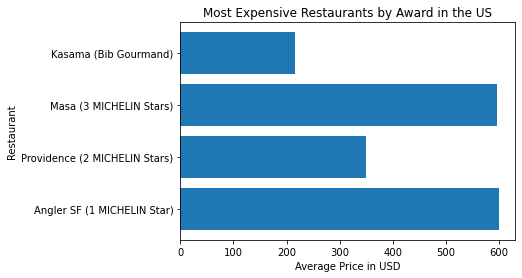

In [27]:
#plots most expensive restaurant by award in the US 
plt.barh(['Angler SF (1 MICHELIN Star)','Providence (2 MICHELIN Stars)','Masa (3 MICHELIN Stars)','Kasama (Bib Gourmand)'],[600,350,595,215])
plt.title('Most Expensive Restaurants by Award in the US')
plt.xlabel('Average Price in USD')
plt.ylabel('Restaurant')
plt.show()

In [28]:
%%sql

select name, average_price,award from michelin_my_maps where location = 'San Francisco' 
order by average_price desc limit 10 ;

 * ibm_db_sa://rzd61380:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB
Done.


name,average_price,award
Angler SF,600.0,1 MICHELIN Star
Niku Steakhouse,402.0,1 MICHELIN Star
Quince,360.0,3 MICHELIN Stars
Benu,350.0,3 MICHELIN Stars
Atelier Crenn,298.0,3 MICHELIN Stars
Saison,277.0,2 MICHELIN Stars
Birdsong,255.0,2 MICHELIN Stars
Coi,250.0,2 MICHELIN Stars
Sons & Daughters,225.0,1 MICHELIN Star
Californios,223.0,2 MICHELIN Stars


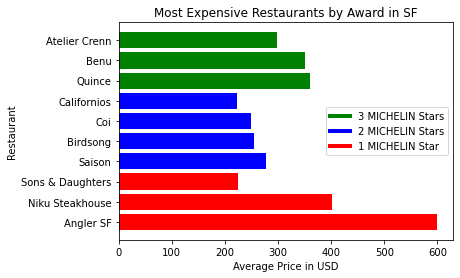

In [29]:
#plots the top 10 most expensive restaurants in SF and groups by award 
sf_10_restaurants = ['Angler SF','Niku Steakhouse','Sons & Daughters','Saison','Birdsong','Coi','Californios','Quince','Benu','Atelier Crenn']

sfplt = plt.barh(sf_10_restaurants,[600,402,225,277,255,250,223,360,350,298],color = ['red','red','red','blue','blue','blue','blue','green','green','green'])
#red = 1 MICHELIN Star
#blue = 2 MICHELIN Stars
#green = 3 MICHELIN Stars
plt.title('Most Expensive Restaurants by Award in SF')
plt.xlabel('Average Price in USD')
plt.ylabel('Restaurant')

from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], color='g', lw=4, label='3 MICHELIN Stars'),
                   Line2D([0], [0], color='b', lw=4,label='2 MICHELIN Stars'),
                   Line2D([0], [0], color='r', lw=4,label='1 MICHELIN Star')]

plt.legend(handles=legend_elements,loc = 'right')